**Canny Edge**

Equivale a aplicação do operador de sobel com algumas etapas a mais.

Etapas:

- Redução de ruídos: Gaussian Blur;
- Encontrar os gradientes de intensidade da imagem: Aplicação do operador de Sobel;
- Supressão não-máxima: Busca diminuir as bordas e deixá-las com a mesma espessura. Busca obter a imagem apenas com a borda.
- Duplo limiar: Busca determinar as bordas potenciais. Busca detectar os pixels: fortes (fazem parte da borda), fracos (meio termo) e não relevantes (não fazem parte das bordas)
- Histeresse: verifica se o pixel faz parte de uma borda forte, suprimindo todas as outras bordas que são fracas e não conectadas a bordas fortes. Selecionar pixels fracos que serão transformados em pixels forte. deve existir pelo menos um pixel forte na vizinhança do pixel fraco.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/gdrive')

!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

Mounted at /content/gdrive


In [ ]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

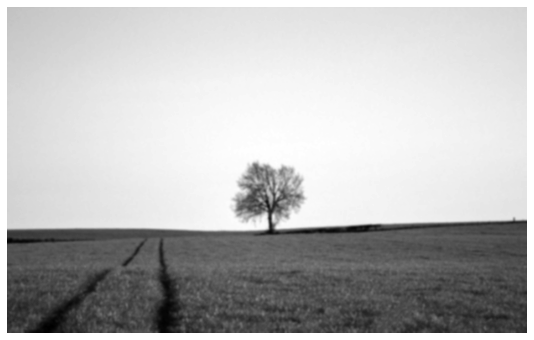

In [ ]:
img = cv2.imread('/content/imagens/paisagem01.jpg')
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

desfoque = cv2.GaussianBlur(imgCinza, (5,5), 0) # Diminui o ruído
mostrar_imagem(desfoque)

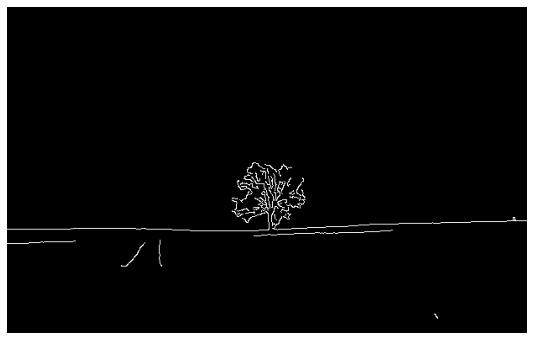

In [ ]:
canny = cv2.Canny(desfoque, 80, # Limiar mínimo, valores abaixo desse limiar não são considerados uma borda
                  140 # Limiar máximo, valores acima desse limiar são considerados uma borda
                  )
mostrar_imagem(canny)

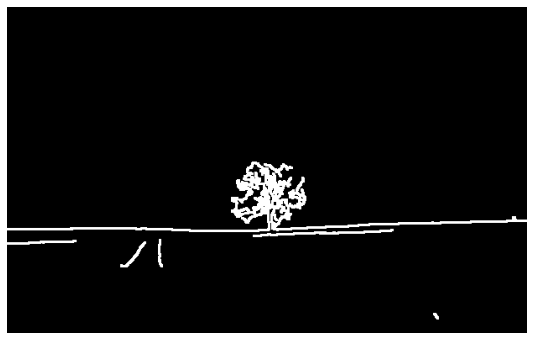

In [ ]:
# Aumentando a expessura das bordas a partir da dilatação
dilatacao = cv2.dilate(canny, np.ones((3,3), np.uint8))
mostrar_imagem(dilatacao)

In [34]:
def segmentacao_bordas(img):
  desfoque = cv2.GaussianBlur(imgCinza, (5,5), 0)

  canny = cv2.Canny(desfoque, 80, 140)

  sobel_x = cv2.Sobel(desfoque, cv2.CV_64F, 1, 0, ksize = 3)
  sobel_y = cv2.Sobel(desfoque, cv2.CV_64F, 0, 1, ksize = 3)
  sobel_x = cv2.convertScaleAbs(sobel_x)
  sobel_y = cv2.convertScaleAbs(sobel_y)
  sobel = cv2.addWeighted(src1 = sobel_x, alpha=0.5, src2 = sobel_y, beta = 0.5, gamma = 0.0) 

  kernel = np.ones((3,3), np.uint8)
  # Operação de fechamento
  dilatacao = cv2.dilate(canny, kernel, iterations=2)
  erosao = cv2.dilate(canny, kernel, iterations=1)

  imagens = [img, sobel, canny, erosao]
  titulos = ['Imagem original', 'Sobel', 'Canny Edge', 'Canny Edge + Fechamento']

  fig = plt.gcf()
  fig.set_size_inches(18, 12)

  for i in range(len(imagens)):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), 'gray')
    plt.title(titulos[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.1)

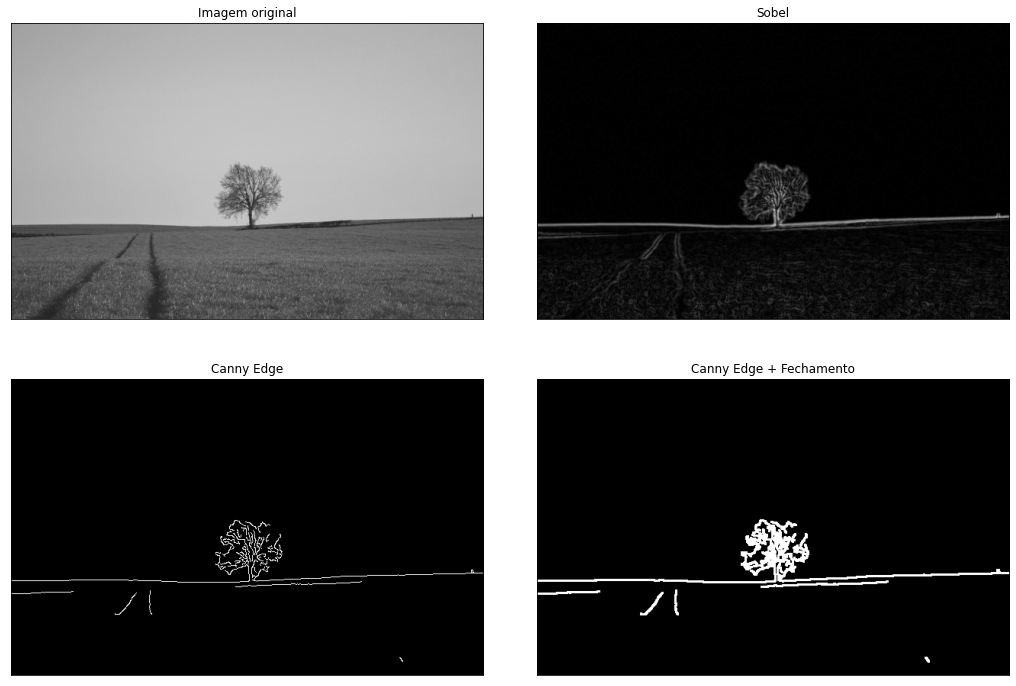

In [35]:
segmentacao_bordas(imgCinza)

**Teste com outras imagens**

O uso do Sobel retornou imagens mais ruídosas

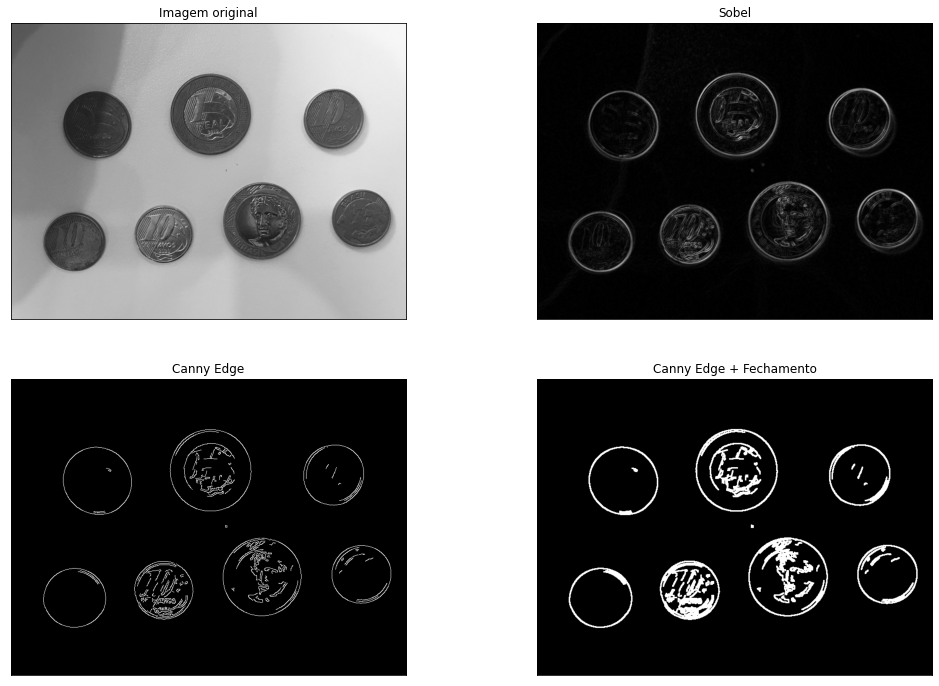

In [36]:
img = cv2.imread('/content/imagens/moedas02.jpg')
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
segmentacao_bordas(imgCinza)

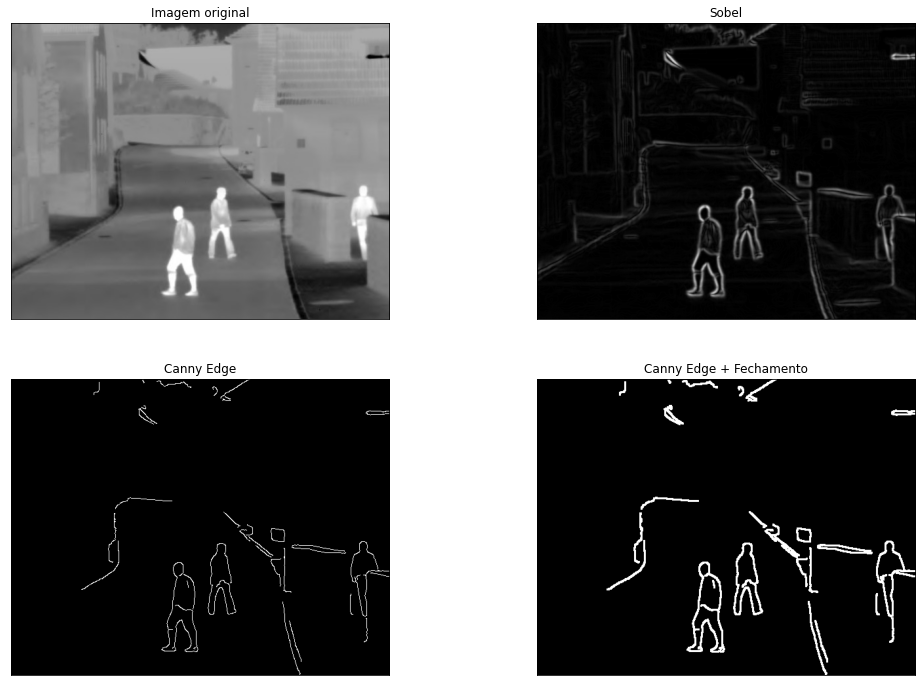

In [37]:
img = cv2.imread('/content/imagens/thermal01.jpg')
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
segmentacao_bordas(imgCinza)

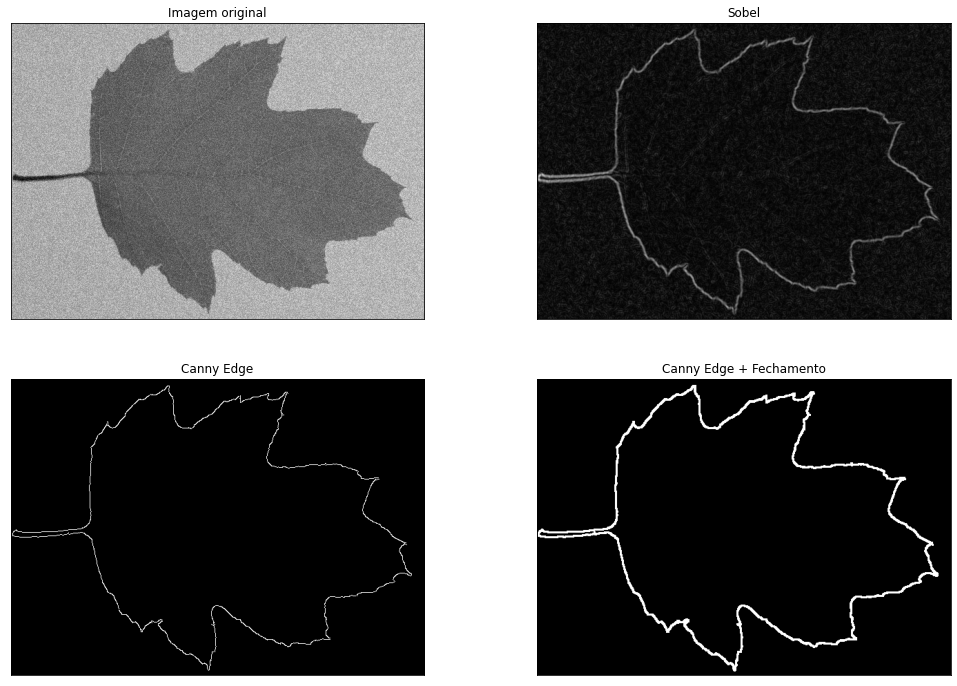

In [38]:
img = cv2.imread('/content/imagens/folha_ruido.jpg')
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
segmentacao_bordas(imgCinza)

**Preenchimento das detecções**

**Fechamento**

Dilatação > Erosão

Essa técnica para o preenchimento, depende do tamanho dos buracos da imagem e da proximidade dos objetos.

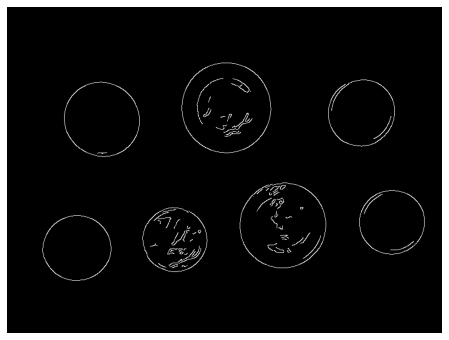

In [39]:
img = cv2.imread('/content/imagens/moedas02.jpg')
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
desfoque = cv2.GaussianBlur(imgCinza, (7,7), 0)
canny = cv2.Canny(desfoque, 80, 140)
mostrar_imagem(canny)

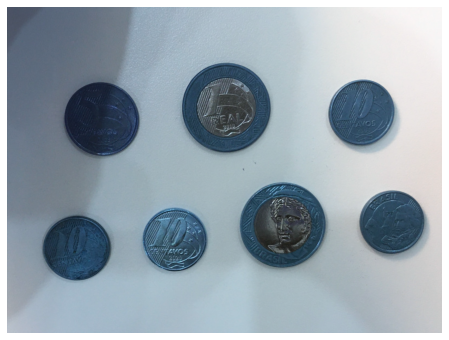

In [41]:
mostrar_imagem(img)

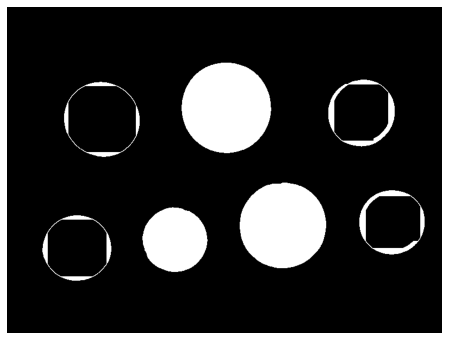

In [40]:
kernel = np.ones((5,5), np.uint8)
dilatacao = cv2.dilate(canny, kernel, iterations = 14)
erosao = cv2.erode(dilatacao, kernel, iterations = 14)
mostrar_imagem(erosao)

**Detecção de contornos**

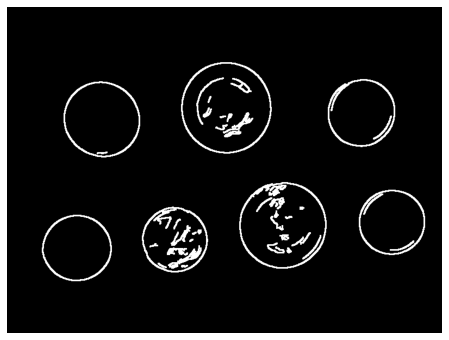

In [42]:
dilatacao = cv2.dilate(canny, np.ones((3,3), np.uint8), iterations=1)
mostrar_imagem(dilatacao)

In [44]:
contornos, hierarquia = cv2.findContours(dilatacao, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

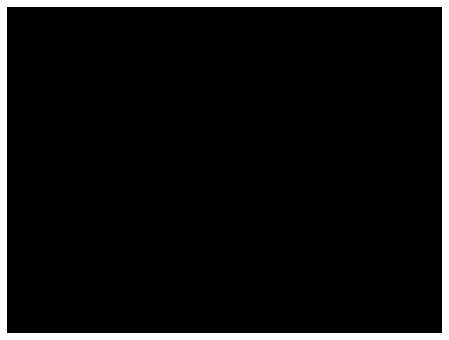

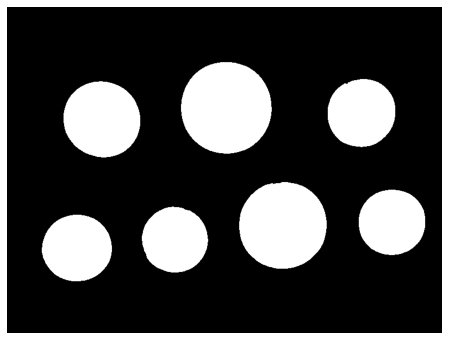

In [46]:
mascara = np.zeros((img.shape[0], img.shape[1]), dtype = np.uint8)
mostrar_imagem(mascara)
cv2.drawContours(mascara, contornos, -1, color = (255,255,255), thickness = cv2.FILLED)
mostrar_imagem(mascara)

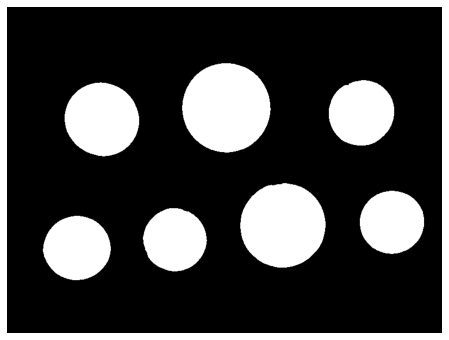

In [47]:
mascara = cv2.erode(mascara, np.ones((3,3), np.uint8), iterations = 2)
mostrar_imagem(mascara)

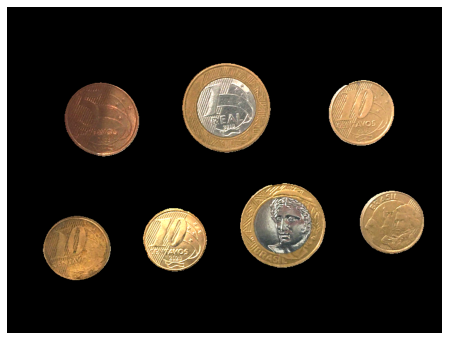

In [48]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_final = cv2.add(img, img, mask = mascara)
mostrar_imagem(img_final)